# Comparison of 4 optimization algorithms



## Steepest Descent

In [10]:
import datetime
import math
import numpy as np
def numGradient(f, x, h):
  # numGradient
  # INPUT
  #      - f objective function
  #      - x coordinates
  #      - h numerical perturbation

  n = len(x)
  g = np.zeros((n))

    #print(n)
  #print(g)
  #print(h)
  for i in range(n):
    e = np.zeros((n))
    e[i] = 1
    

   
    g[i] = (f(x+e*h)-f(x-e*h))/(2*h)
  
  return(g)


def steepestDescent(f, x, a, e, maxIter):
  result = {
        'x_opt': x,
        'f_opt': f(x),
        'x_hist': [],
        'f_hist': [],
        'tEval':None,
        'iter' : 0 }

  currIter=0
  finished=False
  # x_old=x
  x_old=np.array(x)
  # print(x_old)
  while finished == False:
    xthis = x_old - a*numGradient(f, x_old, 10**(-6))
    # print('x_old', x_old)
    # print('xthis=', xthis)
    
    StarT = datetime.datetime.now()
    #print('numgr', a*numGradient(f, x_old, 10**(-6)))
    x_new=lineSearch(f, x_old, x_old - a*numGradient(f, x_old, 10**(-6)), 1)
    
    # print(x_new)
    # print('currIter = ', currIter)
    # # print('maxiter = ',maxIter)
    # # print(abs(f(x_new)-f(x_old)))
    #print('e = ', e)
    # print('f (xnew) = ',f(x_new)) #to jest rowne temu nizej
    # print('f (xold) = ',f(x_old))
    if (currIter <= maxIter) and abs(f(x_new)-f(x_old))>e and f(x_new)<f(x_old):
    	x_old=x_new
    	result['x_opt'] = x_new
    	result['f_opt'] = f(x_new)
    	#print(result['x_hist'])
    	#print(x_new)
    	result['x_hist'].append(x_new)
    	#print(result['x_hist'])
    	result['f_hist'].append(f(x_new))
    	result['iter'] = currIter
    	result['tEval'] = datetime.datetime.now()-StarT
    else:
      finished=True
    currIter=currIter+1
  return result
  
  
def lineSearch(f, x0, x1, gridSize):
  x_best=x0
  for i in range(gridSize):
    t=i/gridSize
    x_new=t*x0 + (1-t)*x1
    if f(x_best) > f(x_new):
      x_best=x_new
  return x_best


def myFun(x) :
    return ( 0.6 + ((math.sin(x[0]**2-x[1]**2))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2) )

# Set Params
xSeed  = (3, 4)
n_grid  = 100
ub_iter = 1000
#set.seed(123)

# Run algorithms
sd = steepestDescent(myFun, xSeed, 0.01, 10**(-13), ub_iter)
print(sd)

{'x_opt': array([2.97196235, 3.88788084]), 'iter': 1000, 'f_hist': [0.17068049721195994, 0.1558931882319382, 0.14699316514199418, 0.14088681527300212, 0.13670182729485875, 0.13361216608346554, 0.13136867565345683, 0.12965602404424614, 0.1283731709287354, 0.1273771280680448, 0.12661730178968178, 0.12602206032997537, 0.12556282278534892, 0.12520134491861012, 0.12492042160831851, 0.12469873631566147, 0.12452560609806823, 0.12438878791255686, 0.12428155749733188, 0.12419673227917127, 0.12413005940059735, 0.12407726077972964, 0.12403564539066975, 0.12400263731419148, 0.12397653639472278, 0.12395577948339764, 0.12393929495051037, 0.12392612890402632, 0.12391560759612524, 0.12390714658740926, 0.12390032332531603, 0.1238947787051371, 0.12389024831476847, 0.12388651105977738, 0.12388340181903695, 0.12388078427873134, 0.12387855550804733, 0.12387663138522842, 0.12387494784817688, 0.12387345295313745, 0.1238721068849401, 0.12387087755836312, 0.12386974025898573, 0.12386867516514222, 0.12386766695

## Genetic Algorithm

In [11]:
import numpy as np
import random
import math 
  
def geneticAlgorithm(f, x_min, x_max, cel, popSize, pMut, maxIter):
  #create function which
 
  
  # geneticAlgorithm
  # INPUT
  #      - f objective function
  #      - x_min vector of the minimum values of coordinates
  #      - x_max vector of the maximum values of coordinates
  #      - cel coordinate encryption length 
  #      - popSize size of the population
  #      - pMut probability of single genome mutation
  #      - maxIter number of generations
  
  result = {
        'x_opt': None,
        'f_opt': None,
        'x_hist': [],
        'f_hist': [],
        'f_mean': []
    
  }
  
  # Check the number of dimensions
  Dim = len(x_min) 
    
  # Initialize Population
  
  population = np.full((popSize, cel*Dim), None)
  for i in range(popSize):
    population[i,:] = np.random.uniform(cel*Dim)<0
    
  coordinates = getCoordinates(population, cel, x_min, x_max, pMut)
  
  # Calculate fittness of individuals
  objFunction = [None]*popSize
  for i in range(popSize):
    objFunction[i] = f(coordinates[i,:])
  
  
  # Assign the first population to output 
  result['x_opt'] = coordinates[np.argmin(objFunction),]
  result['f_opt'] = f(coordinates[np.argmin(objFunction),])
  
  # The generational loop
  finished = False
  currIter = 1
  while(finished == False):
    # Assign the output
    if currIter <= maxIter:
      #print(coordinates)
      if result['f_opt'] > f(coordinates[np.argmin(objFunction),]):
        result['x_opt']= coordinates[np.argmin(objFunction),]
        result['f_opt']= f(coordinates[np.argmin(objFunction),])
      
      result['f_hist'].append(result['f_opt'])
      #print(result['x_hist'])
      #print(coordinates[np.argmin(objFunction)])
      result['x_hist'].append(coordinates[np.argmin(objFunction)])
      result['f_mean'].append(np.mean(objFunction))
    else: finished = True
    
    
    # Translate binary coding into real values  
    coordinates = getCoordinates(population, cel, x_min, x_max, pMut)
    
    # Calculate fittness of the individuals
    objFunction = [None]*popSize
    for i in range(popSize):
        objFunction[i] = f(coordinates[i,:])
    
    #print(objFunction)
    rFitt = min(objFunction)/objFunction # Relative Fittness
    #print(rFitt)
    nrFitt = rFitt / sum(rFitt) # Relative Normalized (sum up to 1) Fittness
    #print(nrFitt)
    # Selection operator (Roulette wheel)
    selectedPool = [0] * popSize
    #print(selectedPool)
    
    #print(np.cumsum(nrFitt))
    #print(np.random.uniform())
    for i in range(popSize):
      #print(np.random.uniform()>np.cumsum(nrFitt))
      selectedPool[i] = sum(np.random.uniform()>np.cumsum(nrFitt))+1 #znowu runif i cumsum
      #print(selectedPool)
    
    
    # Crossover operator (for selected pool)
    nextGeneration = np.full((popSize, cel*Dim), None)
    #print(nextGeneration.shape)
    for i in range(1, popSize):
      parentId = np.round(random.uniform(1,popSize))
      cutId = np.round(random.uniform(1,Dim*cel-1)) # Please, do not exceed the matrix sizes
      # Create offspring
      #print(cutId)
      #print(nextGeneration)
      #print(selectedPool)
      #print(population.shape)
      #print(nextGeneration.shape)
      #print(cutId)
      #print(selectedPool[i])
      #print(int(parentId))
      #print(selectedPool[int(parentId)-1])
      nextGeneration[i, 0:int(cutId)] = population[selectedPool[i]-1, 0:int(cutId)]
      #print(nextGeneration)
        
      nextGeneration[i, int(cutId): (Dim*cel)] = population[selectedPool[int(parentId)-1]-1, (int(cutId)) : (Dim*cel)]
    
    
    # Mutation operator
    for i in range(popSize):
      arr=np.arange(Dim*cel)
      test1=np.random.uniform(size=Dim*cel)>pMut
      #print(test1)
      genomeMutId = arr[np.where(test1)] # Draw the genomes that will mutate
      #print(genomeMutId)
      for j in range(len(genomeMutId)):
        nextGeneration[i, genomeMutId[j]] = not(nextGeneration[i, genomeMutId[j]]) 
      
    
    
    # Replace the old population
    population = nextGeneration
    currIter = currIter + 1
  
  return(result)

# intbin = function(x){
#   # Translate the binary coding to real values numbers
#   return(sum(2^(which(rev(x==1))-1)))
# }  
  
def intbin(x):
  #   # Translate the binary coding to real values numbers
  b = [2**(idx+1) for idx, v in enumerate(x) if v]
  return sum(b) 
  
def getCoordinates(population, cel, x_min, x_max, pMut):
  # Transform the binary coding into coordinates
  coordinates = np.full((population.shape[0], 2), 0)
  #print(coordinates)
  for i in range(population.shape[0]):
    for j in range(2):
      
      s1=cel*(j)+1
      s2=(j+1)*cel
      #print(population)
      #print('first', population[i, range(s1,s2)])
      coordinatesTemp = intbin(population[i, range(s1,s2)])
      #print('coordinates temp', coordinatesTemp)

      coordinates[i,j] = ((x_max[j]-x_min[j])/(2**cel-1))*coordinatesTemp+x_min[j]
      
  return(coordinates)


# Schaffer function:
def myFun(x) :
    return ( 0.6 + ((math.sin(x[0]**2-x[1]**2))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2) )

# Set Params
xSeed  = (3, 4)
n_grid  = 100
ub_iter = 1000
#set.seed(123)


ga = geneticAlgorithm(myFun, (-20, -20), (20, 20), cel=50, popSize = 30, maxIter = ub_iter, pMut = 0.05)
  
print(ga)  

    


{'x_opt': array([0, 0]), 'f_opt': 0.09999999999999998, 'f_mean': [0.4456790123456789, 0.4456790123456789, 0.47242960352887386, 0.46144814373363524, 0.5062712104001276, 0.4977387511957784, 0.44562303058206176, 0.4789992781611899, 0.5019163431324402, 0.5014882495216358, 0.40452246028689126, 0.3919029129854647, 0.3770815449619356, 0.40933179536520886, 0.3861001125305454, 0.25296894358599087, 0.31287331200331925, 0.2770868747423442, 0.40687498786404125, 0.4059763102931072, 0.3651369630558243, 0.41065213965682346, 0.49569369431159377, 0.410893171819614, 0.34276457766432883, 0.4504199118640518, 0.3960749739198087, 0.47207266287621924, 0.49602490024455154, 0.44578321581292574, 0.5106051307664289, 0.592099904334956, 0.5059750944110493, 0.4576894751296832, 0.43707201685430574, 0.369934946879512, 0.47439224977799493, 0.35740352538277914, 0.3987155429849716, 0.3943790060634919, 0.38108246150491154, 0.33901589159401546, 0.3803870820042071, 0.3754586033437829, 0.3672175047440175, 0.5551630341337556

## Simulated Annealing

In [12]:
import math
import random
import numpy as np
def simulatedAnnealing(f, x, alpha, t, delta, maxIter):
    
    result = {
        'x_opt': x,
        'f_opt': f(x),
        'x_hist': [],
        'f_hist': [],
        'temperature': [],
        'transProb':[]
        }
        
    currIter = 1
    finished = False
    x_s = x
      
    while finished == False:
      u=np.random.uniform(0,len(x_s),2)
      # print(u)
      x_c = x_s + (-delta + 2 * delta * u)
      print(x_c)
      A = min (1, np.exp(- (f(x_c)- f(x_s))/t ))
      
      if random.uniform(0,1) < A:
        x_s=x_c
        
      t = alpha * t
      if currIter<maxIter:
        if f(x_s)< f(result['x_opt']):
          result['x_opt'] = x_s
          result['f_opt'] = f(x_s)
        result['x_hist'].append(x_s)
        result['f_hist'].append(f(x_s))
        result['temperature'].append(t)
        result['transProb'].append(A)
      else:
        finished=True
      currIter= currIter +1
      
    return result





xSeed  = (3, 4)
n_grid  = 100
ub_iter = 1000
   
   
def myFun(x) :
    return ( 0.6 + ((math.sin(x[0]**2-x[1]**2))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2) )
    
sa = simulatedAnnealing(myFun, xSeed, 0.2, 100, 0.2, ub_iter)
print(sa)


[3.04566488 4.27480188]
[3.3805478  4.11933368]
[3.59327698 4.31167787]
[3.89217255 4.66264112]
[4.36444387 4.99569243]
[3.72233709 5.10663909]
[3.6467537  4.99516309]
[3.91268366 5.08307476]
[4.30069565 4.92109774]
[4.16373203 5.15469194]
[4.67231075 5.30385033]
[5.12294374 5.57355249]
[5.07439176 5.67949964]
[4.82364089 5.11495983]
[4.80705458 5.63770344]
[4.48623619 5.40584739]
[4.66002589 5.48109832]
[5.22549256 5.64396091]
[4.7694769  5.56904463]
[4.93515596 5.68480399]
[4.53774624 5.65344165]
[4.77558511 5.44173809]
[4.77215348 5.81918204]
[5.02044445 5.6216897 ]
[4.63379071 5.51782918]
[4.81842091 5.15830467]
[4.47830091 5.20782404]
[4.62350952 5.24855664]
[5.22808703 5.7857668 ]
[4.53751408 5.49224876]
[4.66334527 5.50452428]
[4.87300978 5.47755401]
[4.64462674 5.30942276]
[4.67316474 5.57957225]
[4.54879593 5.4532774 ]
[4.82781861 5.49515099]
[4.85715937 5.38278432]
[4.69436512 5.67288497]
[4.87164293 5.47084321]
[4.80118648 5.71914711]
[5.17848398 5.58586227]
[5.22941995 5.37

[4.82286477 5.14674299]
[4.55986385 5.78650672]
[5.08667262 5.573237  ]
[4.99963846 5.6509204 ]
[5.15483331 5.37772188]
[5.1805633  5.71091389]
[4.63538254 5.071735  ]
[4.80867176 5.4393991 ]
[4.57519557 5.65268439]
[4.88080369 5.76692471]
[5.08274234 5.5064439 ]
[4.50539107 5.20314691]
[4.86256048 5.25597353]
[4.96740326 5.09475224]
[4.79818858 5.62491581]
[5.01920421 5.7531212 ]
[4.9002837  5.80790176]
[5.12278193 5.14677003]
[5.02648509 5.82359931]
[4.80961755 5.16579525]
[5.05206687 5.41983404]
[5.04067815 5.70098605]
[4.51477492 5.56650425]
[4.5790813  5.22422924]
[5.16561723 5.52578608]
[4.90206204 5.60915711]
[4.907897   5.37712487]
[4.42596965 5.25386192]
[4.8216574  5.40424092]
[5.14076808 5.79423829]
[4.91743236 5.47680908]
[4.78498111 5.33189805]
[4.59556455 5.33675279]
[4.94787847 5.57431457]
[5.07698357 5.11530366]
[4.85354234 5.48446839]
[4.6556938  5.12527492]
[4.75724413 5.35361513]
[4.7975478  5.53635626]
[4.46956933 5.60374468]
[4.48192373 5.55955659]
[4.63481637 5.13

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


## PSO

In [13]:
import math
# Particle Swarm Optimization
import numpy as np;

# Particle Swarm Optimization
def PSO(problem, VarMin=np.array([-20,-20]), VarMax=np.array([20,20]), nVar=2, MaxIter = 1000, PopSize = 100, parameters = [1.4962, 1.4962, 0.7298]):
#
    # particle parameters
    empty_particle = {
        'position': None,
        'velocity': None,
        'cost': None,
        'best_position': None,
        'best_cost': None,
    };
    # load function
    CostFunction = problem;

    # global best
    gbest = {'position': None, 'cost': np.inf};

    # generating population
    pop = []; 
    for i in range(0, PopSize):
        pop.append(empty_particle.copy());
        pop[i]['position'] = np.random.uniform(VarMin, VarMax, nVar);
        pop[i]['velocity'] = np.zeros(nVar);
        pop[i]['cost'] = CostFunction(pop[i]['position']);
        pop[i]['best_position'] = pop[i]['position'].copy();
        pop[i]['best_cost'] = pop[i]['cost'];
        
        if pop[i]['best_cost'] < gbest['cost']:
            gbest['position'] = pop[i]['best_position'].copy();
            gbest['cost'] = pop[i]['best_cost'];
    
    # main loop
    for it in range(0, MaxIter):
        for i in range(0, PopSize):
            
            pop[i]['velocity'] = parameters[2]*pop[i]['velocity'] \
                + parameters[0]*np.random.rand(nVar)*(pop[i]['best_position'] - pop[i]['position']) \
                + parameters[1]*np.random.rand(nVar)*(gbest['position'] - pop[i]['position']);

            pop[i]['position'] += pop[i]['velocity'];

            pop[i]['cost'] = CostFunction(pop[i]['position']);
            
            if pop[i]['cost'] < pop[i]['best_cost']:
                pop[i]['best_position'] = pop[i]['position'].copy();
                pop[i]['best_cost'] = pop[i]['cost'];

                if pop[i]['best_cost'] < gbest['cost']:
                    gbest['position'] = pop[i]['best_position'].copy();
                    gbest['cost'] = pop[i]['best_cost'];

        print('Iteration {}: Best Cost = {}'.format(it, gbest['cost']));

    return gbest, pop;
    






def myFun(x) :
    return ( 0.6 + ((math.sin(x[0]**2-x[1]**2))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2) )

xSeed  = (3, 4)
n_grid  = 100
ub_iter = 1000
#set.seed(123)

# Run algorithms
ps = PSO(myFun, VarMin=(-20,-20), VarMax=(20,20), nVar=2, MaxIter = ub_iter, PopSize = 1000, parameters = [2, 0.2, 0.7])



Iteration 0: Best Cost = 0.1031496466131463
Iteration 1: Best Cost = 0.10143673246576018
Iteration 2: Best Cost = 0.10103650390376301
Iteration 3: Best Cost = 0.10103650390376301
Iteration 4: Best Cost = 0.10077338329628172
Iteration 5: Best Cost = 0.10000522951715696
Iteration 6: Best Cost = 0.10000522951715696
Iteration 7: Best Cost = 0.10000522951715696
Iteration 8: Best Cost = 0.10000522951715696
Iteration 9: Best Cost = 0.10000522951715696
Iteration 10: Best Cost = 0.10000000974268675
Iteration 11: Best Cost = 0.10000000974268675
Iteration 12: Best Cost = 0.10000000974268675
Iteration 13: Best Cost = 0.10000000974268675
Iteration 14: Best Cost = 0.10000000974268675
Iteration 15: Best Cost = 0.10000000974268675
Iteration 16: Best Cost = 0.10000000974268675
Iteration 17: Best Cost = 0.10000000974268675
Iteration 18: Best Cost = 0.10000000974268675
Iteration 19: Best Cost = 0.10000000974268675
Iteration 20: Best Cost = 0.10000000974268675
Iteration 21: Best Cost = 0.10000000974268675

Iteration 178: Best Cost = 0.09999999999999998
Iteration 179: Best Cost = 0.09999999999999998
Iteration 180: Best Cost = 0.09999999999999998
Iteration 181: Best Cost = 0.09999999999999998
Iteration 182: Best Cost = 0.09999999999999998
Iteration 183: Best Cost = 0.09999999999999998
Iteration 184: Best Cost = 0.09999999999999998
Iteration 185: Best Cost = 0.09999999999999998
Iteration 186: Best Cost = 0.09999999999999998
Iteration 187: Best Cost = 0.09999999999999998
Iteration 188: Best Cost = 0.09999999999999998
Iteration 189: Best Cost = 0.09999999999999998
Iteration 190: Best Cost = 0.09999999999999998
Iteration 191: Best Cost = 0.09999999999999998
Iteration 192: Best Cost = 0.09999999999999998
Iteration 193: Best Cost = 0.09999999999999998
Iteration 194: Best Cost = 0.09999999999999998
Iteration 195: Best Cost = 0.09999999999999998
Iteration 196: Best Cost = 0.09999999999999998
Iteration 197: Best Cost = 0.09999999999999998
Iteration 198: Best Cost = 0.09999999999999998
Iteration 199

Iteration 356: Best Cost = 0.09999999999999998
Iteration 357: Best Cost = 0.09999999999999998
Iteration 358: Best Cost = 0.09999999999999998
Iteration 359: Best Cost = 0.09999999999999998
Iteration 360: Best Cost = 0.09999999999999998
Iteration 361: Best Cost = 0.09999999999999998
Iteration 362: Best Cost = 0.09999999999999998
Iteration 363: Best Cost = 0.09999999999999998
Iteration 364: Best Cost = 0.09999999999999998
Iteration 365: Best Cost = 0.09999999999999998
Iteration 366: Best Cost = 0.09999999999999998
Iteration 367: Best Cost = 0.09999999999999998
Iteration 368: Best Cost = 0.09999999999999998
Iteration 369: Best Cost = 0.09999999999999998
Iteration 370: Best Cost = 0.09999999999999998
Iteration 371: Best Cost = 0.09999999999999998
Iteration 372: Best Cost = 0.09999999999999998
Iteration 373: Best Cost = 0.09999999999999998
Iteration 374: Best Cost = 0.09999999999999998
Iteration 375: Best Cost = 0.09999999999999998
Iteration 376: Best Cost = 0.09999999999999998
Iteration 377

Iteration 532: Best Cost = 0.09999999999999998
Iteration 533: Best Cost = 0.09999999999999998
Iteration 534: Best Cost = 0.09999999999999998
Iteration 535: Best Cost = 0.09999999999999998
Iteration 536: Best Cost = 0.09999999999999998
Iteration 537: Best Cost = 0.09999999999999998
Iteration 538: Best Cost = 0.09999999999999998
Iteration 539: Best Cost = 0.09999999999999998
Iteration 540: Best Cost = 0.09999999999999998
Iteration 541: Best Cost = 0.09999999999999998
Iteration 542: Best Cost = 0.09999999999999998
Iteration 543: Best Cost = 0.09999999999999998
Iteration 544: Best Cost = 0.09999999999999998
Iteration 545: Best Cost = 0.09999999999999998
Iteration 546: Best Cost = 0.09999999999999998
Iteration 547: Best Cost = 0.09999999999999998
Iteration 548: Best Cost = 0.09999999999999998
Iteration 549: Best Cost = 0.09999999999999998
Iteration 550: Best Cost = 0.09999999999999998
Iteration 551: Best Cost = 0.09999999999999998
Iteration 552: Best Cost = 0.09999999999999998
Iteration 553

Iteration 719: Best Cost = 0.09999999999999998
Iteration 720: Best Cost = 0.09999999999999998
Iteration 721: Best Cost = 0.09999999999999998
Iteration 722: Best Cost = 0.09999999999999998
Iteration 723: Best Cost = 0.09999999999999998
Iteration 724: Best Cost = 0.09999999999999998
Iteration 725: Best Cost = 0.09999999999999998
Iteration 726: Best Cost = 0.09999999999999998
Iteration 727: Best Cost = 0.09999999999999998
Iteration 728: Best Cost = 0.09999999999999998
Iteration 729: Best Cost = 0.09999999999999998
Iteration 730: Best Cost = 0.09999999999999998
Iteration 731: Best Cost = 0.09999999999999998
Iteration 732: Best Cost = 0.09999999999999998
Iteration 733: Best Cost = 0.09999999999999998
Iteration 734: Best Cost = 0.09999999999999998
Iteration 735: Best Cost = 0.09999999999999998
Iteration 736: Best Cost = 0.09999999999999998
Iteration 737: Best Cost = 0.09999999999999998
Iteration 738: Best Cost = 0.09999999999999998
Iteration 739: Best Cost = 0.09999999999999998
Iteration 740

Iteration 898: Best Cost = 0.09999999999999998
Iteration 899: Best Cost = 0.09999999999999998
Iteration 900: Best Cost = 0.09999999999999998
Iteration 901: Best Cost = 0.09999999999999998
Iteration 902: Best Cost = 0.09999999999999998
Iteration 903: Best Cost = 0.09999999999999998
Iteration 904: Best Cost = 0.09999999999999998
Iteration 905: Best Cost = 0.09999999999999998
Iteration 906: Best Cost = 0.09999999999999998
Iteration 907: Best Cost = 0.09999999999999998
Iteration 908: Best Cost = 0.09999999999999998
Iteration 909: Best Cost = 0.09999999999999998
Iteration 910: Best Cost = 0.09999999999999998
Iteration 911: Best Cost = 0.09999999999999998
Iteration 912: Best Cost = 0.09999999999999998
Iteration 913: Best Cost = 0.09999999999999998
Iteration 914: Best Cost = 0.09999999999999998
Iteration 915: Best Cost = 0.09999999999999998
Iteration 916: Best Cost = 0.09999999999999998
Iteration 917: Best Cost = 0.09999999999999998
Iteration 918: Best Cost = 0.09999999999999998
Iteration 919

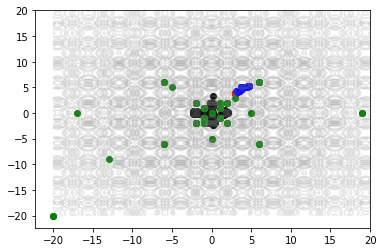

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
data = ps[1]
#pso plot x_hist
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(ub_iter):
    data2= data[i]['position']
    ax.scatter(data2[0], data2[1], color='black')


#sd plot x_hist
data2= sd['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='red')


#ga plot x_hist
data2= ga['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='green')


#sa plot x_hist
data2= sa['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='blue')


x_seq = np.linspace(-20, 20, n_grid)
matrVal = np.full((n_grid, n_grid), None)  
for iRow in range(n_grid):
  for iCol in range(n_grid):
    matrVal[iRow, iCol] = myFun((x_seq[iRow], x_seq[iCol]));

plt.contour(x_seq, x_seq, matrVal, colors='gray', alpha=0.2)

plt.show()




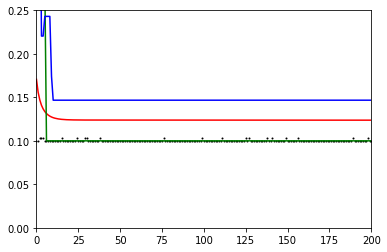

In [15]:
#pso
data = ps[1] #population
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(ub_iter): #accessing the data
    data2= float(data[i]['best_cost'])
    ax.scatter(i, data2, color='black', s=1)
    



#sd plot f_hist
data2= sd['f_hist']
plt.plot(data2, color='red')

#ga plot f_hist
data2= ga['f_hist']
plt.plot(data2, color='green')

#sa plot f_hist
data2= sa['f_hist']
plt.plot(data2, color='blue')

plt.ylim(0, 0.25)
plt.xlim(0, 200)
plt.show()

In [16]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# Results

Table below shows which algorithm implementation is the fastest 


| SD | GA | SA | PSO |
|:---|---| --- | --- |
|  <b><font color='green'>205 ms</font></b> | 7.11 s| 377 ms |  <font color='red'>22.6 s</font> | 


Based on the plot above PSO seems to be the most accurate as the objective function reaches its minimum fastest and the minimum is also the lowest. However this implemetntation of PSO algorithm is also the slowest, with Stepest Descent being the fastest. But at the same time SD algorithm takes most iterations to reach objective function's minimum.


In [ ]:
# Set WD
#setwd('')
import numpy as np
import matplotlib.pyplot as plt
import math

# Load functions


# Objective functions:
# Ellipsoid:
def myFun1(x):
  return( x[0]^2 + 10*x[1]^2)

# Schaffer function:
def myFun(x) :
    return ( 0.6 + ((math.sin(x[0]**2-x[1]**2))**2-0.5)/((1+0.001*(x[0]**2+x[1]**2))**2) )

# Set Params
xSeed  = (3, 4)
n_grid  = 100
ub_iter = 1000
#set.seed(123)

# Run algorithms
sd = steepestDescent(myFun, xSeed, 0.01, 10^-13, ub_iter)
sa = simulatedAnnealing(myFun, xSeed, 0.2, 100, 0.2, ub_iter)
ga = geneticAlgorithm(myFun, (-20, -20), (20, 20), cel=50, popSize = 30, maxIter = ub_iter, pMut = 0.05)
ps = PSO(myFun, VarMin=(-20,-20), VarMax=(20,20), nVar=2, MaxIter = ub_iter, PopSize = 1000, parameters = [2, 0.2, 0.7])



#CONVERGENCES
#PSO
data = ps[1] #population
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(ub_iter): #accessing the data
    data2= float(data[i]['best_cost'])
    ax.scatter(i, data2, color='black')




#sd plot f_hist
data2= sd['f_hist']
plt.plot(data2, color='red')

#ga plot f_hist
data2= ga['f_hist']
plt.plot(data2, color='green')

#sa plot f_hist
data2= sa['f_hist']
plt.plot(data2, color='blue')
plt.show()


#pso plot x_hist
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(ub_iter):
    data2= data[i]['position']
    ax.scatter(data2[0], data2[1], color='black')


#sd plot x_hist
data2= sd['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='red')


#ga plot x_hist
data2= ga['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='green')


#sa plot x_hist
data2= sa['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='blue')


x_seq = np.linspace(-20, 20, n_grid)
matrVal = np.full((n_grid, n_grid), None)  
for iRow in range(n_grid):
  for iCol in range(n_grid):
    matrVal[iRow, iCol] = myFun((x_seq[iRow], x_seq[iCol]));

plt.contour(x_seq, x_seq, matrVal, colors='gray', alpha=0.2)


plt.show()



#POSITIONS

#PSO
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(ub_iter):
    data2= data[i]['position']
    ax.scatter(data2[0], data2[1], color='black')


#sd plot x_hist
data2= sd['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='red')


#ga plot x_hist
data2= ga['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='green')


#sa plot x_hist
data2= sa['x_hist']
for i in data2:
    plt.scatter(i[0],i[1],  color='blue')
plt.show()
    
# Name the best method
print('Best PSO parameters: ', ps[0])


